<a href="https://colab.research.google.com/github/sarthakkar99/BDA594-Sarthak_Kar/blob/main/Copy_of_BigDataBowl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import statsmodels.api as sm
import sklearn
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!ls "/content/gdrive/MyDrive/BigDataBowl"

games.csv    tackles.csv	  tracking_week_3.csv  tracking_week_6.csv  tracking_week_9.csv
players.csv  tracking_week_1.csv  tracking_week_4.csv  tracking_week_7.csv
plays.csv    tracking_week_2.csv  tracking_week_5.csv  tracking_week_8.csv


In [ ]:
#plays.columns

In [4]:
week1=pd.read_csv("/content/gdrive/MyDrive/BigDataBowl/tracking_week_1.csv")
tacklelabels=pd.read_csv("/content/gdrive/MyDrive/BigDataBowl/tackles.csv")
plays=pd.read_csv("/content/gdrive/MyDrive/BigDataBowl/plays.csv")
games=pd.read_csv("/content/gdrive/MyDrive/BigDataBowl/games.csv")
week1_frame1 = week1[week1["frameId"]==1]

columns_to_merge = ['gameId', 'playId','ballCarrierId','quarter','down','yardsToGo','possessionTeam','preSnapHomeScore','preSnapVisitorScore','offenseFormation','defendersInTheBox', 'passResult']
week1_frame1=pd.merge(week1_frame1,plays[columns_to_merge],on=['gameId','playId'],how='left')
#what is down # do we really need the osetion team

columns_to_merge2 = ['gameId', 'homeTeamAbbr', 'visitorTeamAbbr']
week1_frame1=pd.merge(week1_frame1,games[columns_to_merge2],on=['gameId'],how='left')

week1_frame1.head()

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,...,down,yardsToGo,possessionTeam,preSnapHomeScore,preSnapVisitorScore,offenseFormation,defendersInTheBox,passResult,homeTeamAbbr,visitorTeamAbbr
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.37,...,1,10,BUF,0,0,SHOTGUN,6.0,C,LA,BUF
1,2022090800,56,38577.0,Bobby Wagner,1,2022-09-08 20:24:05.200000,45.0,LA,left,78.25,...,1,10,BUF,0,0,SHOTGUN,6.0,C,LA,BUF
2,2022090800,56,41239.0,Aaron Donald,1,2022-09-08 20:24:05.200000,99.0,LA,left,91.08,...,1,10,BUF,0,0,SHOTGUN,6.0,C,LA,BUF
3,2022090800,56,42392.0,Mitch Morse,1,2022-09-08 20:24:05.200000,60.0,BUF,left,88.25,...,1,10,BUF,0,0,SHOTGUN,6.0,C,LA,BUF
4,2022090800,56,42489.0,Stefon Diggs,1,2022-09-08 20:24:05.200000,14.0,BUF,left,80.60,...,1,10,BUF,0,0,SHOTGUN,6.0,C,LA,BUF


In [5]:

week1_frame7=pd.merge(week1_frame1,plays[columns_to_merge],on=['gameId'],how='left')
week1_frame7.head()

,gameId,playId_x,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,...,ballCarrierId_y,quarter_y,down_y,yardsToGo_y,possessionTeam_y,preSnapHomeScore_y,preSnapVisitorScore_y,offenseFormation_y,defendersInTheBox_y,passResult_y
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.37,...,42489,3,1,10,BUF,10,10,SHOTGUN,5.0,C
1,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.37,...,44881,3,2,10,LA,10,17,EMPTY,5.0,C
2,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.37,...,52494,4,2,6,BUF,10,31,I_FORM,7.0,NaN
3,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.37,...,46076,3,2,10,BUF,10,17,SHOTGUN,5.0,NaN
4,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.37,...,52536,1,3,1,BUF,0,0,I_FORM,7.0,C


In [6]:
def calculate_defense_score(row):
    if row['possessionTeam'] == row['visitorTeamAbbr']:
        return row['preSnapHomeScore']
    elif row['possessionTeam'] == row['homeTeamAbbr']:
        return row['preSnapVisitorScore']
    else:
        return None

def calculate_offense_score(row):
    if row['possessionTeam'] == row['visitorTeamAbbr']:
        return row['preSnapVisitorScore']
    elif row['possessionTeam'] == row['homeTeamAbbr']:
        return row['preSnapHomeScore']
    else:
        return None


week1_frame1['defenseTeamScore'] = week1_frame1.apply(calculate_defense_score, axis=1)
week1_frame1['offenseTeamScore'] = week1_frame1.apply(calculate_offense_score, axis=1)
columns_to_drop = ['time','club','possessionTeam','preSnapHomeScore','preSnapVisitorScore', 'homeTeamAbbr', 'visitorTeamAbbr']
week1_frame1 = week1_frame1.drop(columns=columns_to_drop)
week1_frame1.head()

,gameId,playId,nflId,displayName,frameId,jerseyNumber,playDirection,x,y,s,...,event,ballCarrierId,quarter,down,yardsToGo,offenseFormation,defendersInTheBox,passResult,defenseTeamScore,offenseTeamScore
0,2022090800,56,35472.0,Rodger Saffold,1,76.0,left,88.37,27.27,1.62,...,NaN,42489,1,1,10,SHOTGUN,6.0,C,0,0
1,2022090800,56,38577.0,Bobby Wagner,1,45.0,left,78.25,27.53,1.24,...,NaN,42489,1,1,10,SHOTGUN,6.0,C,0,0
2,2022090800,56,41239.0,Aaron Donald,1,99.0,left,91.08,31.61,3.91,...,NaN,42489,1,1,10,SHOTGUN,6.0,C,0,0
3,2022090800,56,42392.0,Mitch Morse,1,60.0,left,88.25,28.74,0.67,...,NaN,42489,1,1,10,SHOTGUN,6.0,C,0,0
4,2022090800,56,42489.0,Stefon Diggs,1,14.0,left,80.60,38.29,6.23,...,NaN,42489,1,1,10,SHOTGUN,6.0,C,0,0


In [7]:
columns_to_merge3 = ['gameId', 'playId', 'nflId', 'tackle', 'assist']
week1_frame1labeled=pd.merge(week1_frame1, tacklelabels[columns_to_merge3], on=['gameId', 'playId', 'nflId'], how='left')
week1_frame1labeled["tackle"] = week1_frame1labeled["tackle"].fillna(0)
week1_frame1labeled["assist"] = week1_frame1labeled["assist"].fillna(0)
week1_frame1labeled.head()

,gameId,playId,nflId,displayName,frameId,jerseyNumber,playDirection,x,y,s,...,quarter,down,yardsToGo,offenseFormation,defendersInTheBox,passResult,defenseTeamScore,offenseTeamScore,tackle,assist
0,2022090800,56,35472.0,Rodger Saffold,1,76.0,left,88.37,27.27,1.62,...,1,1,10,SHOTGUN,6.0,C,0,0,0.0,0.0
1,2022090800,56,38577.0,Bobby Wagner,1,45.0,left,78.25,27.53,1.24,...,1,1,10,SHOTGUN,6.0,C,0,0,0.0,0.0
2,2022090800,56,41239.0,Aaron Donald,1,99.0,left,91.08,31.61,3.91,...,1,1,10,SHOTGUN,6.0,C,0,0,0.0,0.0
3,2022090800,56,42392.0,Mitch Morse,1,60.0,left,88.25,28.74,0.67,...,1,1,10,SHOTGUN,6.0,C,0,0,0.0,0.0
4,2022090800,56,42489.0,Stefon Diggs,1,14.0,left,80.60,38.29,6.23,...,1,1,10,SHOTGUN,6.0,C,0,0,0.0,0.0


In [15]:
week1=pd.read_csv("/content/gdrive/MyDrive/BigDataBowl/tracking_week_1.csv")
tacklelabels=pd.read_csv("/content/gdrive/MyDrive/BigDataBowl/tackles.csv")
plays=pd.read_csv("/content/gdrive/MyDrive/BigDataBowl/plays.csv")
games=pd.read_csv("/content/gdrive/MyDrive/BigDataBowl/games.csv")
players=pd.read_csv("/content/gdrive/MyDrive/BigDataBowl/players.csv")

def calculate_defense_score(row):
    if row['possessionTeam'] == row['visitorTeamAbbr']:
        return row['preSnapHomeScore']
    elif row['possessionTeam'] == row['homeTeamAbbr']:
        return row['preSnapVisitorScore']
    else:
        return None

def calculate_offense_score(row):
    if row['possessionTeam'] == row['visitorTeamAbbr']:
        return row['preSnapVisitorScore']
    elif row['possessionTeam'] == row['homeTeamAbbr']:
        return row['preSnapHomeScore']
    else:
        return None

def process_week_data(tracking_data):
    frame1 = tracking_data[tracking_data["frameId"]==1]
    columns = ['gameId', 'playId','ballCarrierId','quarter','down','yardsToGo','possessionTeam','preSnapHomeScore','preSnapVisitorScore','offenseFormation','defendersInTheBox', 'passResult','passProbability']
    frame1=pd.merge(frame1,plays[columns],on=['gameId','playId'],how='left')
    columns2 = ['gameId', 'homeTeamAbbr', 'visitorTeamAbbr']
    frame1=pd.merge(frame1,games[columns2],on=['gameId'],how='left')
    frame1['defenseTeamScore'] = frame1.apply(calculate_defense_score, axis=1)
    frame1['offenseTeamScore'] = frame1.apply(calculate_offense_score, axis=1)
    columns_to_drop = ['time','club','possessionTeam','preSnapHomeScore','preSnapVisitorScore', 'homeTeamAbbr', 'visitorTeamAbbr']
    frame1 = frame1.drop(columns=columns_to_drop)
    columns3 = ['nflId','position']
    frame1=pd.merge(frame1,players[columns3],on=['nflId'],how='left')
    columns4 = ['gameId', 'playId', 'nflId', 'tackle', 'assist']
    frame1labeled=pd.merge(frame1, tacklelabels[columns4], on=['gameId', 'playId', 'nflId'], how='left')
    frame1labeled["tackle"] = frame1labeled["tackle"].fillna(0)
    frame1labeled["assist"] = frame1labeled["assist"].fillna(0)
    frame1labeled["passResult"]=frame1labeled["passResult"].replace({'C': 'catch', 'R': 'scramble', pd.NA: 'run'})
    frame1labeled = frame1labeled.rename(columns={'passResult': 'playType'})
    categorical_columns = ['quarter', 'down', 'yardsToGo', 'offenseFormation', 'defendersInTheBox', 'tackle', 'assist','playType']
    frame1labeled[categorical_columns] = frame1labeled[categorical_columns].astype('category')
    return frame1labeled

week1_processed = process_week_data(week1)
week1_processed.head()

,gameId,playId,nflId,displayName,frameId,jerseyNumber,playDirection,x,y,s,...,yardsToGo,offenseFormation,defendersInTheBox,playType,passProbability,defenseTeamScore,offenseTeamScore,position,tackle,assist
0,2022090800,56,35472.0,Rodger Saffold,1,76.0,left,88.37,27.27,1.62,...,10,SHOTGUN,6.0,catch,0.68996,0,0,G,0.0,0.0
1,2022090800,56,38577.0,Bobby Wagner,1,45.0,left,78.25,27.53,1.24,...,10,SHOTGUN,6.0,catch,0.68996,0,0,ILB,0.0,0.0
2,2022090800,56,41239.0,Aaron Donald,1,99.0,left,91.08,31.61,3.91,...,10,SHOTGUN,6.0,catch,0.68996,0,0,DT,0.0,0.0
3,2022090800,56,42392.0,Mitch Morse,1,60.0,left,88.25,28.74,0.67,...,10,SHOTGUN,6.0,catch,0.68996,0,0,C,0.0,0.0
4,2022090800,56,42489.0,Stefon Diggs,1,14.0,left,80.60,38.29,6.23,...,10,SHOTGUN,6.0,catch,0.68996,0,0,WR,0.0,0.0


In [16]:
week2=pd.read_csv("/content/gdrive/MyDrive/BigDataBowl/tracking_week_2.csv")
week3=pd.read_csv("/content/gdrive/MyDrive/BigDataBowl/tracking_week_3.csv")
week4=pd.read_csv("/content/gdrive/MyDrive/BigDataBowl/tracking_week_4.csv")
week5=pd.read_csv("/content/gdrive/MyDrive/BigDataBowl/tracking_week_5.csv")
week6=pd.read_csv("/content/gdrive/MyDrive/BigDataBowl/tracking_week_6.csv")
week7=pd.read_csv("/content/gdrive/MyDrive/BigDataBowl/tracking_week_7.csv")
week8=pd.read_csv("/content/gdrive/MyDrive/BigDataBowl/tracking_week_8.csv")


In [17]:
week2_processed = process_week_data(week2)
week3_processed = process_week_data(week3)
week4_processed = process_week_data(week4)
week5_processed = process_week_data(week5)
week6_processed = process_week_data(week6)
week7_processed = process_week_data(week7)
week8_processed = process_week_data(week8)

In [18]:
week4_processed.columns

Index(['gameId', 'playId', 'nflId', 'displayName', 'frameId', 'jerseyNumber',
       'playDirection', 'x', 'y', 's', 'a', 'dis', 'o', 'dir', 'event',
       'ballCarrierId', 'quarter', 'down', 'yardsToGo', 'offenseFormation',
       'defendersInTheBox', 'playType', 'passProbability', 'defenseTeamScore',
       'offenseTeamScore', 'position', 'tackle', 'assist'],
      dtype='object')

In [19]:
week1_processed.head()

,gameId,playId,nflId,displayName,frameId,jerseyNumber,playDirection,x,y,s,...,yardsToGo,offenseFormation,defendersInTheBox,playType,passProbability,defenseTeamScore,offenseTeamScore,position,tackle,assist
0,2022090800,56,35472.0,Rodger Saffold,1,76.0,left,88.37,27.27,1.62,...,10,SHOTGUN,6.0,catch,0.68996,0,0,G,0.0,0.0
1,2022090800,56,38577.0,Bobby Wagner,1,45.0,left,78.25,27.53,1.24,...,10,SHOTGUN,6.0,catch,0.68996,0,0,ILB,0.0,0.0
2,2022090800,56,41239.0,Aaron Donald,1,99.0,left,91.08,31.61,3.91,...,10,SHOTGUN,6.0,catch,0.68996,0,0,DT,0.0,0.0
3,2022090800,56,42392.0,Mitch Morse,1,60.0,left,88.25,28.74,0.67,...,10,SHOTGUN,6.0,catch,0.68996,0,0,C,0.0,0.0
4,2022090800,56,42489.0,Stefon Diggs,1,14.0,left,80.60,38.29,6.23,...,10,SHOTGUN,6.0,catch,0.68996,0,0,WR,0.0,0.0


In [20]:
week_processed_list = [week1_processed, week2_processed, week3_processed, week4_processed, week5_processed, week6_processed, week7_processed, week8_processed]
all_week_processed = pd.concat(week_processed_list, ignore_index=True)
all_week_processed['nflId'] = all_week_processed['nflId'].astype(str)
all_week_processed.loc[all_week_processed['displayName'] == 'football', 'nflId'] = 'football'
all_week_processed.head()

,gameId,playId,nflId,displayName,frameId,jerseyNumber,playDirection,x,y,s,...,yardsToGo,offenseFormation,defendersInTheBox,playType,passProbability,defenseTeamScore,offenseTeamScore,position,tackle,assist
0,2022090800,56,35472.0,Rodger Saffold,1,76.0,left,88.37,27.27,1.62,...,10,SHOTGUN,6.0,catch,0.68996,0,0,G,0.0,0.0
1,2022090800,56,38577.0,Bobby Wagner,1,45.0,left,78.25,27.53,1.24,...,10,SHOTGUN,6.0,catch,0.68996,0,0,ILB,0.0,0.0
2,2022090800,56,41239.0,Aaron Donald,1,99.0,left,91.08,31.61,3.91,...,10,SHOTGUN,6.0,catch,0.68996,0,0,DT,0.0,0.0
3,2022090800,56,42392.0,Mitch Morse,1,60.0,left,88.25,28.74,0.67,...,10,SHOTGUN,6.0,catch,0.68996,0,0,C,0.0,0.0
4,2022090800,56,42489.0,Stefon Diggs,1,14.0,left,80.60,38.29,6.23,...,10,SHOTGUN,6.0,catch,0.68996,0,0,WR,0.0,0.0


In [21]:
football_positions = all_week_processed[all_week_processed['nflId'] == 'football'][['gameId', 'playId', 'x', 'y']]
football_positions.rename(columns={'x': 'football_x', 'y': 'football_y'}, inplace=True)

# Merge the football positions DataFrame with the main DataFrame
all_week_processed = pd.merge(all_week_processed, football_positions, on=['gameId', 'playId'], how='left')

# Calculate relative x and y for all players, making football's position (0, 0)
all_week_processed['x_relative'] = all_week_processed['x'] - all_week_processed['football_x']
all_week_processed['y_relative'] = all_week_processed['y'] - all_week_processed['football_y']
all_week_processed.head()

,gameId,playId,nflId,displayName,frameId,jerseyNumber,playDirection,x,y,s,...,passProbability,defenseTeamScore,offenseTeamScore,position,tackle,assist,football_x,football_y,x_relative,y_relative
0,2022090800,56,35472.0,Rodger Saffold,1,76.0,left,88.37,27.27,1.62,...,0.68996,0,0,G,0.0,0.0,85.050003,33.810001,3.319997,-6.540001
1,2022090800,56,38577.0,Bobby Wagner,1,45.0,left,78.25,27.53,1.24,...,0.68996,0,0,ILB,0.0,0.0,85.050003,33.810001,-6.800003,-6.280001
2,2022090800,56,41239.0,Aaron Donald,1,99.0,left,91.08,31.61,3.91,...,0.68996,0,0,DT,0.0,0.0,85.050003,33.810001,6.029997,-2.200001
3,2022090800,56,42392.0,Mitch Morse,1,60.0,left,88.25,28.74,0.67,...,0.68996,0,0,C,0.0,0.0,85.050003,33.810001,3.199997,-5.070001
4,2022090800,56,42489.0,Stefon Diggs,1,14.0,left,80.60,38.29,6.23,...,0.68996,0,0,WR,0.0,0.0,85.050003,33.810001,-4.450003,4.479999


In [22]:
all_week_processed.groupby(['gameId','playId'])
all_week_processed.head(23)

,gameId,playId,nflId,displayName,frameId,jerseyNumber,playDirection,x,y,s,...,passProbability,defenseTeamScore,offenseTeamScore,position,tackle,assist,football_x,football_y,x_relative,y_relative
0,2022090800,56,35472.0,Rodger Saffold,1,76.0,left,88.370000,27.270000,1.620000,...,0.68996,0,0,G,0.0,0.0,85.050003,33.810001,3.319997,-6.540001
1,2022090800,56,38577.0,Bobby Wagner,1,45.0,left,78.250000,27.530000,1.240000,...,0.68996,0,0,ILB,0.0,0.0,85.050003,33.810001,-6.800003,-6.280001
2,2022090800,56,41239.0,Aaron Donald,1,99.0,left,91.080000,31.610000,3.910000,...,0.68996,0,0,DT,0.0,0.0,85.050003,33.810001,6.029997,-2.200001
3,2022090800,56,42392.0,Mitch Morse,1,60.0,left,88.250000,28.740000,0.670000,...,0.68996,0,0,C,0.0,0.0,85.050003,33.810001,3.199997,-5.070001
4,2022090800,56,42489.0,Stefon Diggs,1,14.0,left,80.600000,38.290000,6.230000,...,0.68996,0,0,WR,0.0,0.0,85.050003,33.810001,-4.450003,4.479999
5,2022090800,56,42816.0,Troy Hill,1,2.0,left,72.340000,7.810000,4.360000,...,0.68996,0,0,CB,0.0,0.0,85.050003,33.810001,-12.710003,-26.000001
6,2022090800,56,43294.0,Jalen Ramsey,1,5.0,left,77.950000,40.780000,5.500000,...,0.68996,0,0,CB,1.0,0.0,85.050003,33.810001,-7.100003,6.969999
7,2022090800,56,43298.0,Leonard Floyd,1,54.0,left,91.990000,33.780000,1.860000,...,0.68996,0,0,DE,0.0,0.0,85.050003,33.810001,6.939997,-0.030001
8,2022090800,56,43335.0,A'Shawn Robinson,1,94.0,left,88.510000,25.470000,1.090000,...,0.68996,0,0,DT,0.0,0.0,85.050003,33.810001,3.459997,-8.340001
9,2022090800,56,44875.0,Dion Dawkins,1,73.0,left,89.420000,25.810000,1.890000,...,0.68996,0,0,T,0.0,0.0,85.050003,33.810001,4.369997,-8.000001


In [23]:
pairing_has_football = all_week_processed.groupby(['gameId', 'playId'])['displayName'].apply(lambda x: (x == 'football').any())

# Check if all pairings have at least one 'football' row
all_pairings_have_football = pairing_has_football.all()

# Now, all_pairings_have_football is a boolean that indicates if all pairings have 'football' in at least one row
if all_pairings_have_football:
    print("All unique pairings of gameId and playId have at least one row with displayName 'football'.")
else:
    print("Not all unique pairings of gameId and playId have at least one row with displayName 'football'.")

All unique pairings of gameId and playId have at least one row with displayName 'football'.


In [24]:
all_week_processed["playType"].value_counts()
#all_week_processed["offenseFormation"].value_counts()
all_week_processed.columns

Index(['gameId', 'playId', 'nflId', 'displayName', 'frameId', 'jerseyNumber',
       'playDirection', 'x', 'y', 's', 'a', 'dis', 'o', 'dir', 'event',
       'ballCarrierId', 'quarter', 'down', 'yardsToGo', 'offenseFormation',
       'defendersInTheBox', 'playType', 'passProbability', 'defenseTeamScore',
       'offenseTeamScore', 'position', 'tackle', 'assist', 'football_x',
       'football_y', 'x_relative', 'y_relative'],
      dtype='object')

In [25]:
#print(week1_frame1labeled["tackle"].value_counts())
#print(week1_frame1labeled["tackle"].unique())
grouped = week1_frame1labeled.groupby(['gameId', 'playId'])
grouped
play_has_tackle = grouped['tackle'].transform('any')
#unique_pairings_with_tackle = week1_frame1labeled[play_has_tackle]
play_has_tackle

0        True
1        True
2        True
3        True
4        True
         ... 
33874    True
33875    True
33876    True
33877    True
33878    True
Name: tackle, Length: 33879, dtype: bool

In [26]:
week1_frame1labeled = week1_frame1labeled.reset_index(drop=True)

# Apply the condition and filter the DataFrame
pairings_with_false = week1_frame1labeled[~play_has_tackle]

# Print the DataFrame with pairings that return False
#print(pairings_with_false)
week1_frame1labeled[(week1_frame1labeled["gameId"]==2022090800)&(week1_frame1labeled["playId"]==146)].head(5)

,gameId,playId,nflId,displayName,frameId,jerseyNumber,playDirection,x,y,s,...,quarter,down,yardsToGo,offenseFormation,defendersInTheBox,passResult,defenseTeamScore,offenseTeamScore,tackle,assist
92,2022090800,146,35472.0,Rodger Saffold,1,76.0,left,59.86,27.81,0.00,...,1,1,10,SHOTGUN,6.0,NaN,0,0,0.0,0.0
93,2022090800,146,38577.0,Bobby Wagner,1,45.0,left,53.77,28.06,0.07,...,1,1,10,SHOTGUN,6.0,NaN,0,0,0.0,1.0
94,2022090800,146,41239.0,Aaron Donald,1,99.0,left,57.99,26.81,0.01,...,1,1,10,SHOTGUN,6.0,NaN,0,0,0.0,0.0
95,2022090800,146,42392.0,Mitch Morse,1,60.0,left,59.49,29.48,0.00,...,1,1,10,SHOTGUN,6.0,NaN,0,0,0.0,0.0
96,2022090800,146,42448.0,Jamison Crowder,1,80.0,left,60.98,23.69,0.00,...,1,1,10,SHOTGUN,6.0,NaN,0,0,0.0,0.0


In [27]:
# Normalize the x-coordinates to a (-1, 1) scale
# Where 0 represents the 50-yard line, -1 represents the left goal line, and 1 represents the right goal line
# Subtract 1.2 because the 'x' column had 60 representing the 50-yard line
week1_frame1labeled['x_norm'] = (1/50) * week1_frame1labeled['x'] - 1.2
week1_frame1labeled

,gameId,playId,nflId,displayName,frameId,jerseyNumber,playDirection,x,y,s,...,down,yardsToGo,offenseFormation,defendersInTheBox,passResult,defenseTeamScore,offenseTeamScore,tackle,assist,x_norm
0,2022090800,56,35472.0,Rodger Saffold,1,76.0,left,88.370000,27.27,1.62,...,1,10,SHOTGUN,6.0,C,0,0,0.0,0.0,0.5674
1,2022090800,56,38577.0,Bobby Wagner,1,45.0,left,78.250000,27.53,1.24,...,1,10,SHOTGUN,6.0,C,0,0,0.0,0.0,0.3650
2,2022090800,56,41239.0,Aaron Donald,1,99.0,left,91.080000,31.61,3.91,...,1,10,SHOTGUN,6.0,C,0,0,0.0,0.0,0.6216
3,2022090800,56,42392.0,Mitch Morse,1,60.0,left,88.250000,28.74,0.67,...,1,10,SHOTGUN,6.0,C,0,0,0.0,0.0,0.5650
4,2022090800,56,42489.0,Stefon Diggs,1,14.0,left,80.600000,38.29,6.23,...,1,10,SHOTGUN,6.0,C,0,0,0.0,0.0,0.4120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33874,2022091200,3826,52526.0,Albert Okwuegbunam,1,85.0,left,52.930000,31.24,1.77,...,3,14,SHOTGUN,3.0,C,17,16,0.0,0.0,-0.1414
33875,2022091200,3826,53464.0,Javonte Williams,1,33.0,left,70.710000,13.90,4.01,...,3,14,SHOTGUN,3.0,C,17,16,0.0,0.0,0.2142
33876,2022091200,3826,54505.0,Boye Mafe,1,53.0,left,71.480000,27.14,3.44,...,3,14,SHOTGUN,3.0,C,17,16,0.0,0.0,0.2296
33877,2022091200,3826,54618.0,Tariq Woolen,1,27.0,left,53.280000,15.53,5.45,...,3,14,SHOTGUN,3.0,C,17,16,0.0,0.0,-0.1344


In [28]:
# Repeat for the y-coordinates; normalize to a (0, 1) scale
week1_frame1labeled['y_norm'] = (1/53.3) * week1_frame1labeled['y']
week1_frame1labeled

,gameId,playId,nflId,displayName,frameId,jerseyNumber,playDirection,x,y,s,...,yardsToGo,offenseFormation,defendersInTheBox,passResult,defenseTeamScore,offenseTeamScore,tackle,assist,x_norm,y_norm
0,2022090800,56,35472.0,Rodger Saffold,1,76.0,left,88.370000,27.27,1.62,...,10,SHOTGUN,6.0,C,0,0,0.0,0.0,0.5674,0.511632
1,2022090800,56,38577.0,Bobby Wagner,1,45.0,left,78.250000,27.53,1.24,...,10,SHOTGUN,6.0,C,0,0,0.0,0.0,0.3650,0.516510
2,2022090800,56,41239.0,Aaron Donald,1,99.0,left,91.080000,31.61,3.91,...,10,SHOTGUN,6.0,C,0,0,0.0,0.0,0.6216,0.593058
3,2022090800,56,42392.0,Mitch Morse,1,60.0,left,88.250000,28.74,0.67,...,10,SHOTGUN,6.0,C,0,0,0.0,0.0,0.5650,0.539212
4,2022090800,56,42489.0,Stefon Diggs,1,14.0,left,80.600000,38.29,6.23,...,10,SHOTGUN,6.0,C,0,0,0.0,0.0,0.4120,0.718386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33874,2022091200,3826,52526.0,Albert Okwuegbunam,1,85.0,left,52.930000,31.24,1.77,...,14,SHOTGUN,3.0,C,17,16,0.0,0.0,-0.1414,0.586116
33875,2022091200,3826,53464.0,Javonte Williams,1,33.0,left,70.710000,13.90,4.01,...,14,SHOTGUN,3.0,C,17,16,0.0,0.0,0.2142,0.260788
33876,2022091200,3826,54505.0,Boye Mafe,1,53.0,left,71.480000,27.14,3.44,...,14,SHOTGUN,3.0,C,17,16,0.0,0.0,0.2296,0.509193
33877,2022091200,3826,54618.0,Tariq Woolen,1,27.0,left,53.280000,15.53,5.45,...,14,SHOTGUN,3.0,C,17,16,0.0,0.0,-0.1344,0.291370


In [29]:
week1_frame1labeled.columns

Index(['gameId', 'playId', 'nflId', 'displayName', 'frameId', 'jerseyNumber',
       'playDirection', 'x', 'y', 's', 'a', 'dis', 'o', 'dir', 'event',
       'ballCarrierId', 'quarter', 'down', 'yardsToGo', 'offenseFormation',
       'defendersInTheBox', 'passResult', 'defenseTeamScore',
       'offenseTeamScore', 'tackle', 'assist', 'x_norm', 'y_norm'],
      dtype='object')

In [30]:
df=week1_frame1labeled.drop(['x','y'],axis=1)
df

,gameId,playId,nflId,displayName,frameId,jerseyNumber,playDirection,s,a,dis,...,yardsToGo,offenseFormation,defendersInTheBox,passResult,defenseTeamScore,offenseTeamScore,tackle,assist,x_norm,y_norm
0,2022090800,56,35472.0,Rodger Saffold,1,76.0,left,1.62,1.15,0.16,...,10,SHOTGUN,6.0,C,0,0,0.0,0.0,0.5674,0.511632
1,2022090800,56,38577.0,Bobby Wagner,1,45.0,left,1.24,3.81,0.11,...,10,SHOTGUN,6.0,C,0,0,0.0,0.0,0.3650,0.516510
2,2022090800,56,41239.0,Aaron Donald,1,99.0,left,3.91,2.34,0.40,...,10,SHOTGUN,6.0,C,0,0,0.0,0.0,0.6216,0.593058
3,2022090800,56,42392.0,Mitch Morse,1,60.0,left,0.67,1.97,0.07,...,10,SHOTGUN,6.0,C,0,0,0.0,0.0,0.5650,0.539212
4,2022090800,56,42489.0,Stefon Diggs,1,14.0,left,6.23,0.90,0.62,...,10,SHOTGUN,6.0,C,0,0,0.0,0.0,0.4120,0.718386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33874,2022091200,3826,52526.0,Albert Okwuegbunam,1,85.0,left,1.77,3.05,0.18,...,14,SHOTGUN,3.0,C,17,16,0.0,0.0,-0.1414,0.586116
33875,2022091200,3826,53464.0,Javonte Williams,1,33.0,left,4.01,1.45,0.41,...,14,SHOTGUN,3.0,C,17,16,0.0,0.0,0.2142,0.260788
33876,2022091200,3826,54505.0,Boye Mafe,1,53.0,left,3.44,2.86,0.34,...,14,SHOTGUN,3.0,C,17,16,0.0,0.0,0.2296,0.509193
33877,2022091200,3826,54618.0,Tariq Woolen,1,27.0,left,5.45,2.33,0.55,...,14,SHOTGUN,3.0,C,17,16,0.0,0.0,-0.1344,0.291370


In [31]:
df=df.iloc[:]
df

,gameId,playId,nflId,displayName,frameId,jerseyNumber,playDirection,s,a,dis,...,yardsToGo,offenseFormation,defendersInTheBox,passResult,defenseTeamScore,offenseTeamScore,tackle,assist,x_norm,y_norm
0,2022090800,56,35472.0,Rodger Saffold,1,76.0,left,1.62,1.15,0.16,...,10,SHOTGUN,6.0,C,0,0,0.0,0.0,0.5674,0.511632
1,2022090800,56,38577.0,Bobby Wagner,1,45.0,left,1.24,3.81,0.11,...,10,SHOTGUN,6.0,C,0,0,0.0,0.0,0.3650,0.516510
2,2022090800,56,41239.0,Aaron Donald,1,99.0,left,3.91,2.34,0.40,...,10,SHOTGUN,6.0,C,0,0,0.0,0.0,0.6216,0.593058
3,2022090800,56,42392.0,Mitch Morse,1,60.0,left,0.67,1.97,0.07,...,10,SHOTGUN,6.0,C,0,0,0.0,0.0,0.5650,0.539212
4,2022090800,56,42489.0,Stefon Diggs,1,14.0,left,6.23,0.90,0.62,...,10,SHOTGUN,6.0,C,0,0,0.0,0.0,0.4120,0.718386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33874,2022091200,3826,52526.0,Albert Okwuegbunam,1,85.0,left,1.77,3.05,0.18,...,14,SHOTGUN,3.0,C,17,16,0.0,0.0,-0.1414,0.586116
33875,2022091200,3826,53464.0,Javonte Williams,1,33.0,left,4.01,1.45,0.41,...,14,SHOTGUN,3.0,C,17,16,0.0,0.0,0.2142,0.260788
33876,2022091200,3826,54505.0,Boye Mafe,1,53.0,left,3.44,2.86,0.34,...,14,SHOTGUN,3.0,C,17,16,0.0,0.0,0.2296,0.509193
33877,2022091200,3826,54618.0,Tariq Woolen,1,27.0,left,5.45,2.33,0.55,...,14,SHOTGUN,3.0,C,17,16,0.0,0.0,-0.1344,0.291370


In [32]:
df_copy=df[:]
df_copy.head()

,gameId,playId,nflId,displayName,frameId,jerseyNumber,playDirection,s,a,dis,...,yardsToGo,offenseFormation,defendersInTheBox,passResult,defenseTeamScore,offenseTeamScore,tackle,assist,x_norm,y_norm
0,2022090800,56,35472.0,Rodger Saffold,1,76.0,left,1.62,1.15,0.16,...,10,SHOTGUN,6.0,C,0,0,0.0,0.0,0.5674,0.511632
1,2022090800,56,38577.0,Bobby Wagner,1,45.0,left,1.24,3.81,0.11,...,10,SHOTGUN,6.0,C,0,0,0.0,0.0,0.3650,0.516510
2,2022090800,56,41239.0,Aaron Donald,1,99.0,left,3.91,2.34,0.40,...,10,SHOTGUN,6.0,C,0,0,0.0,0.0,0.6216,0.593058
3,2022090800,56,42392.0,Mitch Morse,1,60.0,left,0.67,1.97,0.07,...,10,SHOTGUN,6.0,C,0,0,0.0,0.0,0.5650,0.539212
4,2022090800,56,42489.0,Stefon Diggs,1,14.0,left,6.23,0.90,0.62,...,10,SHOTGUN,6.0,C,0,0,0.0,0.0,0.4120,0.718386


In [33]:
df_copy1=df[:]
select_column1=[]
select_column=[]
for col in df_copy.columns:
  numeric_check = pd.to_numeric(df_copy[col], errors='coerce')

  # Check if there are any non-numeric values (NaNs) after conversion
  is_numerical = not numeric_check.isna().any()

  if is_numerical:
    print(f"The column '{col}' contains numerical values.")
    select_column1.append(col)
  else:
    select_column.append(col)
    print(f"The column '{col}' does not contain numerical values.")
#print(col+" "+ )

The column 'gameId' contains numerical values.
The column 'playId' contains numerical values.
The column 'nflId' does not contain numerical values.
The column 'displayName' does not contain numerical values.
The column 'frameId' contains numerical values.
The column 'jerseyNumber' does not contain numerical values.
The column 'playDirection' does not contain numerical values.
The column 's' contains numerical values.
The column 'a' contains numerical values.
The column 'dis' contains numerical values.
The column 'o' does not contain numerical values.
The column 'dir' does not contain numerical values.
The column 'event' does not contain numerical values.
The column 'ballCarrierId' contains numerical values.
The column 'quarter' contains numerical values.
The column 'down' contains numerical values.
The column 'yardsToGo' contains numerical values.
The column 'offenseFormation' does not contain numerical values.
The column 'defendersInTheBox' does not contain numerical values.
The colum

In [34]:
df_copy1.columns

Index(['gameId', 'playId', 'nflId', 'displayName', 'frameId', 'jerseyNumber',
       'playDirection', 's', 'a', 'dis', 'o', 'dir', 'event', 'ballCarrierId',
       'quarter', 'down', 'yardsToGo', 'offenseFormation', 'defendersInTheBox',
       'passResult', 'defenseTeamScore', 'offenseTeamScore', 'tackle',
       'assist', 'x_norm', 'y_norm'],
      dtype='object')

In [35]:
X = df_copy1.loc[:, ~df_copy1.columns.isin(['tackle'])]
y=df_copy1['tackle']

In [36]:
print(X)

           gameId  playId    nflId         displayName  frameId  jerseyNumber  \
0      2022090800      56  35472.0      Rodger Saffold        1          76.0   
1      2022090800      56  38577.0        Bobby Wagner        1          45.0   
2      2022090800      56  41239.0        Aaron Donald        1          99.0   
3      2022090800      56  42392.0         Mitch Morse        1          60.0   
4      2022090800      56  42489.0        Stefon Diggs        1          14.0   
...           ...     ...      ...                 ...      ...           ...   
33874  2022091200    3826  52526.0  Albert Okwuegbunam        1          85.0   
33875  2022091200    3826  53464.0    Javonte Williams        1          33.0   
33876  2022091200    3826  54505.0           Boye Mafe        1          53.0   
33877  2022091200    3826  54618.0        Tariq Woolen        1          27.0   
33878  2022091200    3826      NaN            football        1           NaN   

      playDirection      s 

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import StratifiedKFold
# from sklearn.tree import DecisionTreeClassifier

# tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)
# tree_clf.fit(X_train,X_test)
# skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
# acc=[]

# for train_index, test_index in skf.split(X, y):
#     x_train_fold, x_test_fold = X[train_index], X[test_index]
#     y_train_fold, y_test_fold = y[train_index], y[test_index]
#     tree_clf.fit(x_train_fold,y_train_fold)
#     #lr.fit(x_train_fold, y_train_fold)
#     acc.append(tree_clf.score(x_test_fold, y_test_fold))
# print(acc)

ValueError: ignored

In [37]:
df_copy1['tackle'].value_counts()

0.0    32665
1.0     1214
Name: tackle, dtype: int64

In [ ]:
#cv = KFolds(n_splits=10)


In [ ]:
sorted(val,reverse=True)

['C']

In [38]:
i=0
for col in df_copy1.columns:
  if i==10:
    break
  # numeric_check = pd.to_numeric(df_copy[col], errors='coerce')
  # is_numerical = not numeric_check.isna().any()
  type1=df[col].dtype
  null_values=df_copy1[col].isna().sum()
  i+=1
  if type1==object:
    print(f'Columns name {col}, has {null_values} null values, has string values')
    continue
  print(f'Columns name {col}, has {null_values} null values, has numerical values of type {type1}')

Columns name gameId, has 0 null values, has numerical values of type int64
Columns name playId, has 0 null values, has numerical values of type int64
Columns name nflId, has 1473 null values, has numerical values of type float64
Columns name displayName, has 0 null values, has string values
Columns name frameId, has 0 null values, has numerical values of type int64
Columns name jerseyNumber, has 1473 null values, has numerical values of type float64
Columns name playDirection, has 0 null values, has string values
Columns name s, has 0 null values, has numerical values of type float64
Columns name a, has 0 null values, has numerical values of type float64
Columns name dis, has 0 null values, has numerical values of type float64


In [ ]:
#df_copy1['displayName'].nunique()

In [ ]:
#df_copy1['nflId'].nunique()

# drop the nflid gameid jersey number

In [39]:
i=0
for col in df_copy1.columns:
  i+=1
  if i<10:
    continue
  if i>=20:
    break
  #print(1)
  type1=df[col].dtype
  null_values=df_copy1[col].isna().sum()

  if type1==object:
    print(f'Columns name {col}, has {null_values} null values, has string values')
    continue
  print(f'Columns name {col}, has {null_values} null values, has numerical values of type {type1}')

Columns name dis, has 0 null values, has numerical values of type float64
Columns name o, has 1472 null values, has numerical values of type float64
Columns name dir, has 1472 null values, has numerical values of type float64
Columns name event, has 31786 null values, has string values
Columns name ballCarrierId, has 0 null values, has numerical values of type int64
Columns name quarter, has 0 null values, has numerical values of type int64
Columns name down, has 0 null values, has numerical values of type int64
Columns name yardsToGo, has 0 null values, has numerical values of type int64
Columns name offenseFormation, has 23 null values, has string values
Columns name defendersInTheBox, has 23 null values, has numerical values of type float64


In [40]:
i=0
for col in df_copy1.columns:
  i+=1
  if i<20:
    continue
  #print(1)
  type1=df[col].dtype
  null_values=df_copy1[col].isna().sum()

  if type1==object:
    print(f'Columns name {col}, has {null_values} null values, has string values')
    continue
  print(f'Columns name {col}, has {null_values} null values, has numerical values of type {type1}')

Columns name passResult, has 16468 null values, has string values
Columns name defenseTeamScore, has 0 null values, has numerical values of type int64
Columns name offenseTeamScore, has 0 null values, has numerical values of type int64
Columns name tackle, has 0 null values, has numerical values of type float64
Columns name assist, has 0 null values, has numerical values of type float64
Columns name x_norm, has 0 null values, has numerical values of type float64
Columns name y_norm, has 0 null values, has numerical values of type float64


In [41]:
c=0
d=0
for i in range(33000):
  if df_copy1.iloc[i]['tackle']==df_copy1.iloc[i]['assist']:
    c+=1
  else:
    d+=1
print(c)
print(d)
# if we want to check if we are tackling or not what is the present senario

31247
1753


In [42]:
c=0
d=0
for i in range(33000):
  if df_copy1.iloc[i]['nflId']==df_copy1.iloc[i]['ballCarrierId'] and df_copy1.iloc[i]['tackle']==1:
    c+=1
  else:
    d+=1
print(c)
print(d)

0
33000


In [ ]:
#df_copy1.drop(['nflId','gameId','passResult','jerseyNumber'],axis=1,inplace=True)

In [43]:
df_copy

,gameId,playId,nflId,displayName,frameId,jerseyNumber,playDirection,s,a,dis,...,yardsToGo,offenseFormation,defendersInTheBox,passResult,defenseTeamScore,offenseTeamScore,tackle,assist,x_norm,y_norm
0,2022090800,56,35472.0,Rodger Saffold,1,76.0,left,1.62,1.15,0.16,...,10,SHOTGUN,6.0,C,0,0,0.0,0.0,0.5674,0.511632
1,2022090800,56,38577.0,Bobby Wagner,1,45.0,left,1.24,3.81,0.11,...,10,SHOTGUN,6.0,C,0,0,0.0,0.0,0.3650,0.516510
2,2022090800,56,41239.0,Aaron Donald,1,99.0,left,3.91,2.34,0.40,...,10,SHOTGUN,6.0,C,0,0,0.0,0.0,0.6216,0.593058
3,2022090800,56,42392.0,Mitch Morse,1,60.0,left,0.67,1.97,0.07,...,10,SHOTGUN,6.0,C,0,0,0.0,0.0,0.5650,0.539212
4,2022090800,56,42489.0,Stefon Diggs,1,14.0,left,6.23,0.90,0.62,...,10,SHOTGUN,6.0,C,0,0,0.0,0.0,0.4120,0.718386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33874,2022091200,3826,52526.0,Albert Okwuegbunam,1,85.0,left,1.77,3.05,0.18,...,14,SHOTGUN,3.0,C,17,16,0.0,0.0,-0.1414,0.586116
33875,2022091200,3826,53464.0,Javonte Williams,1,33.0,left,4.01,1.45,0.41,...,14,SHOTGUN,3.0,C,17,16,0.0,0.0,0.2142,0.260788
33876,2022091200,3826,54505.0,Boye Mafe,1,53.0,left,3.44,2.86,0.34,...,14,SHOTGUN,3.0,C,17,16,0.0,0.0,0.2296,0.509193
33877,2022091200,3826,54618.0,Tariq Woolen,1,27.0,left,5.45,2.33,0.55,...,14,SHOTGUN,3.0,C,17,16,0.0,0.0,-0.1344,0.291370


In [44]:
df_grouped=df_copy1.groupby('displayName')

In [45]:
len(df_copy1.columns)

26

In [ ]:
df_grouped

In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.base import BaseEstimator, TransformerMixin
"""
    BaseEstimator:
        BaseEstimator is the base class for all scikit-learn estimators (models).
        It provides default implementations for common methods such as get_params() and set_params().
        When you create a custom estimator, it's good practice to inherit from BaseEstimator to ensure compatibility with scikit-learn's conventions.

    TransformerMixin:
        TransformerMixin is another base class that provides a convenient mix-in class for transformers specifically.
        It automatically provides the fit_transform() method based on the fit() and transform() methods that you implement.
        When you create a custom transformer (a component that transforms data, such as a preprocessing step), inheriting from TransformerMixin simplifies the process.

"""
class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        """
        Custom transformer for computing similarity using k-means clustering and RBF kernel.

        Parameters:
        - n_clusters: Number of clusters for k-means. Default is 10.
        - gamma: RBF kernel parameter. Default is 1.0.
        - random_state: Random seed for reproducibility. Default is None.
        """
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        """
        Fit k-means model to input data.

        Parameters:
        - X: Input data.
        - y: Unused.
        - sample_weight: Optional sample weights.

        Returns:
        - self: The instance itself.
        """
        # Create k-means instance
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        # Fit k-means model
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        """
        Transform input data by computing similarity using RBF kernel.

        Parameters:
        - X: Input data.

        Returns:
        - Similarity matrix.
        """
        # Use RBF kernel to compute similarity
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        """
        Get feature names for the transformed data.

        Parameters:
        - names: Unused.

        Returns:
        - List of feature names.
        """
        # Generate feature names based on the number of clusters
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [ ]:
df_copy1.columns

In [ ]:
df_copy1.drop([['gameId', 'nflId',]])

In [87]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
#this select all the columns
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1, random_state=42)

In [47]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio),
        StandardScaler())
log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log),
    StandardScaler()
)
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown='ignore')
)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"))
def angle(X):
  print(X)
  return int(X)/360

angle_1=angle(X)

angle_pipeline=make_pipeline(FunctionTransformer(angle))
min_max_scaler=make_pipeline(MinMaxScaler(X))
preprocessing=ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["dis", "yardsToGo", "offenseTeamScore",
                               "defenseTeamScore", "s"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("angle", angle,["o"])
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
        ("passresult",cat_pipeline),


           #remainder=default_num_pipeline
    ])


<>:37: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?
<>:37: SyntaxWarning: 'tuple' object is not callable; perhaps you missed a comma?


NameError: ignored

In [ ]:
df_copy['o'].value_counts()

90.00     66
262.99     9
264.55     9
90.42      8
267.57     8
          ..
124.58     1
158.47     1
167.77     1
219.70     1
315.69     1
Name: o, Length: 20003, dtype: int64

In [ ]:
df_copy1.columns

Index(['gameId', 'playId', 'nflId', 'displayName', 'frameId', 'jerseyNumber',
       'playDirection', 's', 'a', 'dis', 'o', 'dir', 'event', 'ballCarrierId',
       'quarter', 'down', 'yardsToGo', 'offenseFormation', 'defendersInTheBox',
       'passResult', 'defenseTeamScore', 'offenseTeamScore', 'tackle',
       'assist', 'x_norm', 'y_norm'],
      dtype='object')

In [ ]:
df_copy1.event

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
33874    NaN
33875    NaN
33876    NaN
33877    NaN
33878    NaN
Name: event, Length: 33879, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


encoded_data = le.fit_transform(df_copy.offenseFormation)
encoded_data1 = le.fit_transform(df_copy.playDirection)

In [ ]:
df['offenseFormation']=encoded_data

In [ ]:
df_copy1=df_copy1.drop(['nflId','passResult','gameId','passResult','displayName','jerseyNumber'],axis=1)

In [ ]:
df_copy['playDirection']=encoded_data1

In [ ]:
df_copy['displayName'].nunique()

1166

In [ ]:
len(df_copy)

33879

In [ ]:
df_grouped=df_copy.groupby('displayName')

In [ ]:
df_grouped.head()

,gameId,playId,nflId,displayName,frameId,jerseyNumber,playDirection,s,a,dis,...,yardsToGo,offenseFormation,defendersInTheBox,passResult,defenseTeamScore,offenseTeamScore,tackle,assist,x_norm,y_norm
0,2022090800,56,35472.0,Rodger Saffold,1,76.0,0,1.62,1.15,0.16,...,10,SHOTGUN,6.0,C,0,0,0.0,0.0,0.5674,0.511632
1,2022090800,56,38577.0,Bobby Wagner,1,45.0,0,1.24,3.81,0.11,...,10,SHOTGUN,6.0,C,0,0,0.0,0.0,0.3650,0.516510
2,2022090800,56,41239.0,Aaron Donald,1,99.0,0,3.91,2.34,0.40,...,10,SHOTGUN,6.0,C,0,0,0.0,0.0,0.6216,0.593058
3,2022090800,56,42392.0,Mitch Morse,1,60.0,0,0.67,1.97,0.07,...,10,SHOTGUN,6.0,C,0,0,0.0,0.0,0.5650,0.539212
4,2022090800,56,42489.0,Stefon Diggs,1,14.0,0,6.23,0.90,0.62,...,10,SHOTGUN,6.0,C,0,0,0.0,0.0,0.4120,0.718386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33567,2022091200,3149,44855.0,Sidney Jones,1,23.0,0,5.69,1.70,0.58,...,9,SHOTGUN,6.0,C,17,13,0.0,0.0,0.2230,0.654597
33588,2022091200,3173,44855.0,Sidney Jones,1,23.0,0,0.25,0.50,0.02,...,10,SINGLEBACK,6.0,NaN,17,13,1.0,0.0,-0.2952,0.743340
33596,2022091200,3173,48198.0,Bryan Mone,1,90.0,0,0.06,0.11,0.01,...,10,SINGLEBACK,6.0,NaN,17,13,0.0,0.0,-0.2558,0.537899
33613,2022091200,3216,44855.0,Sidney Jones,1,23.0,0,7.75,1.89,0.78,...,2,SINGLEBACK,6.0,C,17,13,0.0,0.0,-0.7542,0.711069


In [48]:
df_copy.playDirection.value_counts()

left     17296
right    16583
Name: playDirection, dtype: int64

In [49]:
df['offenseFormation'].value_counts()

SHOTGUN       18101
SINGLEBACK     9269
I_FORM         2622
EMPTY          2001
PISTOL         1633
JUMBO           184
WILDCAT          46
Name: offenseFormation, dtype: int64

In [50]:
df_copy.passResult.value_counts()#there are many null value in value counts

C    15824
R     1587
Name: passResult, dtype: int64

In [51]:
df_copy['event'].value_counts()#is event important


pass_arrived             1587
man_in_motion             299
pass_forward              113
shift                      46
pass_shovel                23
line_set                   23
autoevent_passforward       2
Name: event, dtype: int64

In [52]:
df_copy['offenseFormation'].value_counts()

SHOTGUN       18101
SINGLEBACK     9269
I_FORM         2622
EMPTY          2001
PISTOL         1633
JUMBO           184
WILDCAT          46
Name: offenseFormation, dtype: int64

In [53]:
df_copy.isna().sum()

gameId                   0
playId                   0
nflId                 1473
displayName              0
frameId                  0
jerseyNumber          1473
playDirection            0
s                        0
a                        0
dis                      0
o                     1472
dir                   1472
event                31786
ballCarrierId            0
quarter                  0
down                     0
yardsToGo                0
offenseFormation        23
defendersInTheBox       23
passResult           16468
defenseTeamScore         0
offenseTeamScore         0
tackle                   0
assist                   0
x_norm                   0
y_norm                   0
dtype: int64

In [54]:
df_copy['passResult'].isna().sum()

16468

In [55]:
df_copy['passResult'].fillna('S')

0        C
1        C
2        C
3        C
4        C
        ..
33874    C
33875    C
33876    C
33877    C
33878    C
Name: passResult, Length: 33879, dtype: object

In [56]:
df_copy['passresult']=df_copy['passResult']
for val in df_copy['passResult']:
  if val=='S':
    df_copy['passresult']=0
  if val=='R':
    df_copy['passresult']=1
  if val=='C':
    df_copy['passresult']=2

len(df_copy)

<ipython-input-56-01624cee68f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['passresult']=df_copy['passResult']
<ipython-input-56-01624cee68f7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['passresult']=2
<ipython-input-56-01624cee68f7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

33879

In [57]:
df_copy=df_copy.drop(['nflId','passResult','gameId','passResult','displayName','jerseyNumber'],axis=1)

In [58]:
df_copy.fillna(0)

,playId,frameId,playDirection,s,a,dis,o,dir,event,ballCarrierId,...,yardsToGo,offenseFormation,defendersInTheBox,defenseTeamScore,offenseTeamScore,tackle,assist,x_norm,y_norm,passresult
0,56,1,left,1.62,1.15,0.16,231.74,147.90,0,42489,...,10,SHOTGUN,6.0,0,0,0.0,0.0,0.5674,0.511632,2
1,56,1,left,1.24,3.81,0.11,4.20,331.67,0,42489,...,10,SHOTGUN,6.0,0,0,0.0,0.0,0.3650,0.516510,2
2,56,1,left,3.91,2.34,0.40,168.33,132.02,0,42489,...,10,SHOTGUN,6.0,0,0,0.0,0.0,0.6216,0.593058,2
3,56,1,left,0.67,1.97,0.07,244.21,30.29,0,42489,...,10,SHOTGUN,6.0,0,0,0.0,0.0,0.5650,0.539212,2
4,56,1,left,6.23,0.90,0.62,140.05,189.38,0,42489,...,10,SHOTGUN,6.0,0,0,0.0,0.0,0.4120,0.718386,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33874,3826,1,left,1.77,3.05,0.18,130.67,202.72,0,53464,...,14,SHOTGUN,3.0,17,16,0.0,0.0,-0.1414,0.586116,2
33875,3826,1,left,4.01,1.45,0.41,8.68,178.63,0,53464,...,14,SHOTGUN,3.0,17,16,0.0,0.0,0.2142,0.260788,2
33876,3826,1,left,3.44,2.86,0.34,152.49,165.18,0,53464,...,14,SHOTGUN,3.0,17,16,0.0,0.0,0.2296,0.509193,2
33877,3826,1,left,5.45,2.33,0.55,315.69,280.04,0,53464,...,14,SHOTGUN,3.0,17,16,0.0,0.0,-0.1344,0.291370,2


In [59]:
dummies=pd.get_dummies(df.offenseFormation)

In [60]:
dummies

,EMPTY,I_FORM,JUMBO,PISTOL,SHOTGUN,SINGLEBACK,WILDCAT
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
33874,0,0,0,0,1,0,0
33875,0,0,0,0,1,0,0
33876,0,0,0,0,1,0,0
33877,0,0,0,0,1,0,0


In [61]:
dummies.value_counts()

EMPTY  I_FORM  JUMBO  PISTOL  SHOTGUN  SINGLEBACK  WILDCAT
0      0       0      0       1        0           0          18101
                              0        1           0           9269
       1       0      0       0        0           0           2622
1      0       0      0       0        0           0           2001
0      0       0      1       0        0           0           1633
               1      0       0        0           0            184
               0      0       0        0           1             46
                                                   0             23
dtype: int64

In [ ]:
# df_copy['offenseFomation1'],df_copy['offenseFomation2'],df_copy['offenseFomation3'],df_copy['offenseFomation4'],df_copy['offenseFomation5'],df_copy['offenseFomation6'],df_copy['offenseFomation7'],df_copy['offenseFomation8']=dummies

In [62]:
#df_copy['tackle']=df['passResult']
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
df_copy_1hot = cat_encoder.fit_transform(df_copy)

In [63]:
df_copy

,playId,frameId,playDirection,s,a,dis,o,dir,event,ballCarrierId,...,yardsToGo,offenseFormation,defendersInTheBox,defenseTeamScore,offenseTeamScore,tackle,assist,x_norm,y_norm,passresult
0,56,1,left,1.62,1.15,0.16,231.74,147.90,NaN,42489,...,10,SHOTGUN,6.0,0,0,0.0,0.0,0.5674,0.511632,2
1,56,1,left,1.24,3.81,0.11,4.20,331.67,NaN,42489,...,10,SHOTGUN,6.0,0,0,0.0,0.0,0.3650,0.516510,2
2,56,1,left,3.91,2.34,0.40,168.33,132.02,NaN,42489,...,10,SHOTGUN,6.0,0,0,0.0,0.0,0.6216,0.593058,2
3,56,1,left,0.67,1.97,0.07,244.21,30.29,NaN,42489,...,10,SHOTGUN,6.0,0,0,0.0,0.0,0.5650,0.539212,2
4,56,1,left,6.23,0.90,0.62,140.05,189.38,NaN,42489,...,10,SHOTGUN,6.0,0,0,0.0,0.0,0.4120,0.718386,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33874,3826,1,left,1.77,3.05,0.18,130.67,202.72,NaN,53464,...,14,SHOTGUN,3.0,17,16,0.0,0.0,-0.1414,0.586116,2
33875,3826,1,left,4.01,1.45,0.41,8.68,178.63,NaN,53464,...,14,SHOTGUN,3.0,17,16,0.0,0.0,0.2142,0.260788,2
33876,3826,1,left,3.44,2.86,0.34,152.49,165.18,NaN,53464,...,14,SHOTGUN,3.0,17,16,0.0,0.0,0.2296,0.509193,2
33877,3826,1,left,5.45,2.33,0.55,315.69,280.04,NaN,53464,...,14,SHOTGUN,3.0,17,16,0.0,0.0,-0.1344,0.291370,2


In [64]:
df_copy_1hot

<33879x62143 sparse matrix of type '<class 'numpy.float64'>'
	with 745338 stored elements in Compressed Sparse Row format>

In [65]:
from sklearn.model_selection import train_test_split
X = df_copy.loc[:, ~df_copy.columns.isin(['tackle'])]
y=df_copy['tackle']

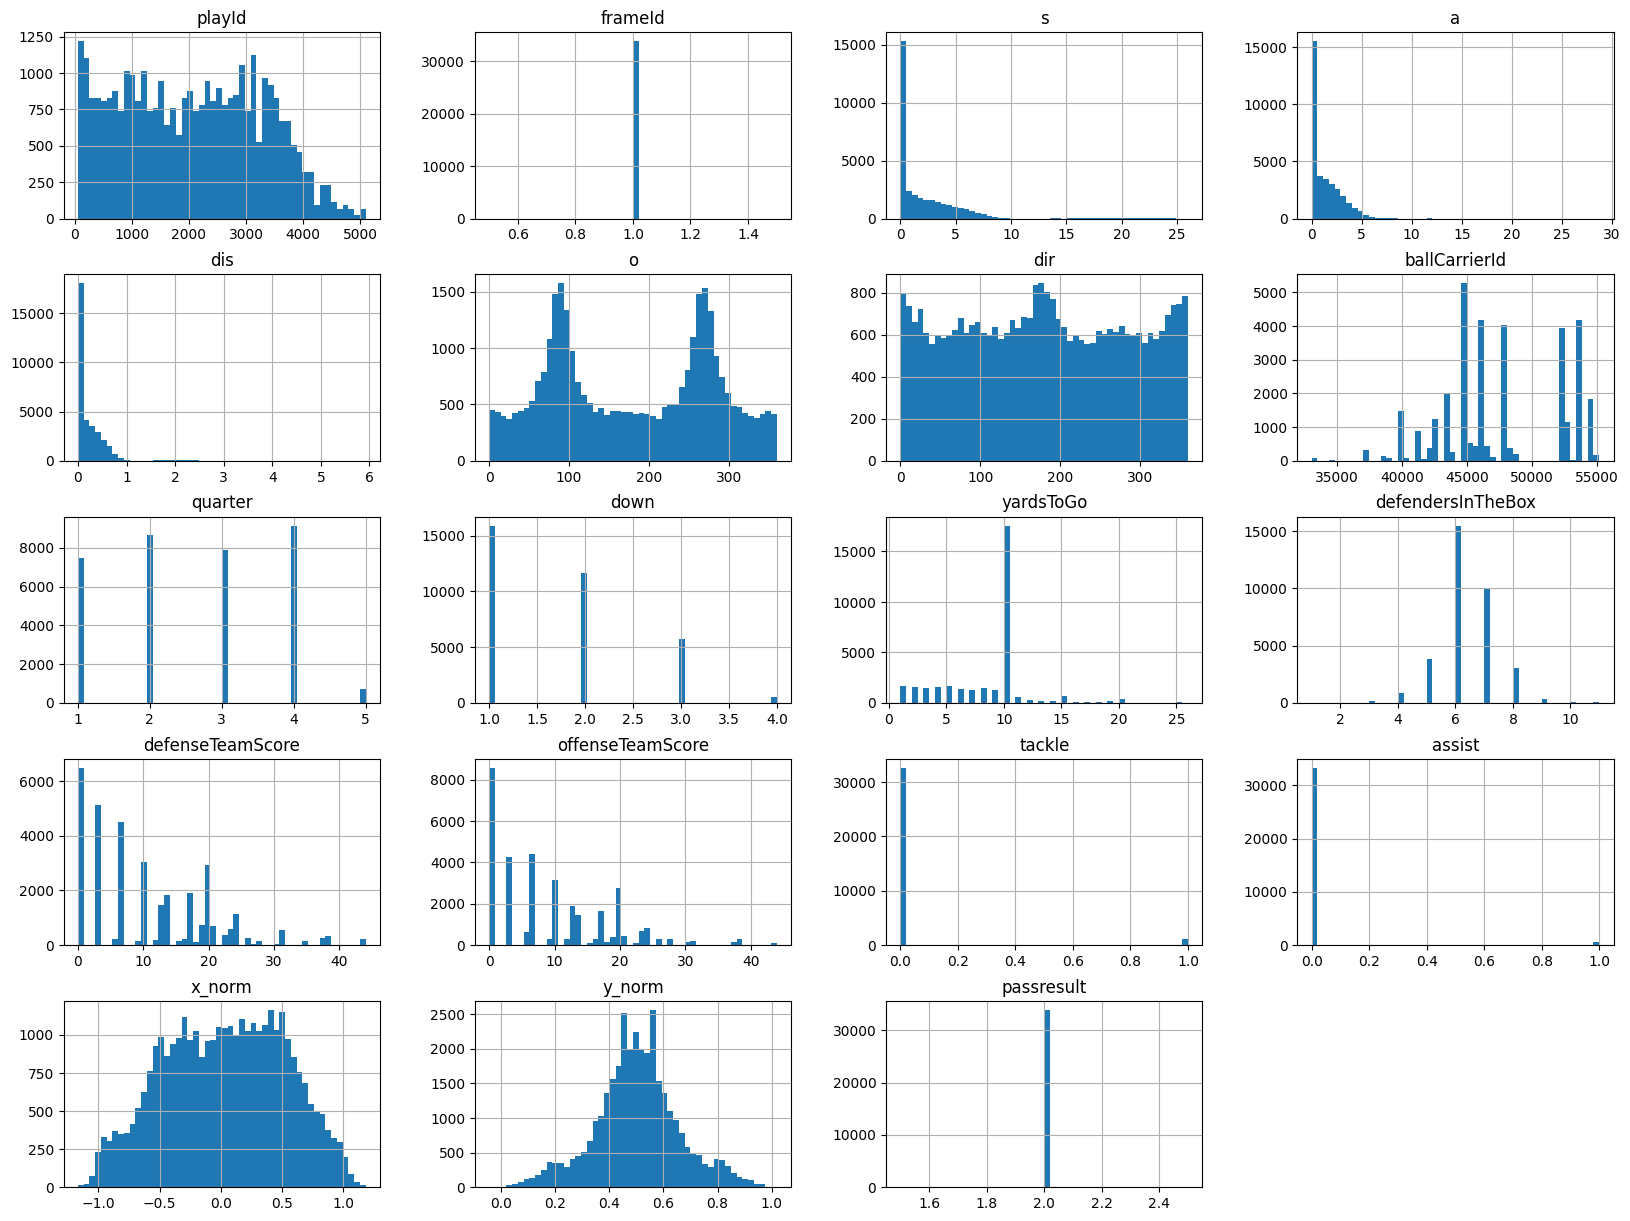

In [66]:
df_copy.hist(bins=50, figsize=(20,15))
plt.show()


In [67]:
df_copy['offenseTeamScorelog']=np.log(df_copy['offenseTeamScore'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [68]:
df_copy['offenseTeamScorelog']=np.log(df_copy['offenseTeamScore'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
# df_copy=df_copy.drop(['offenseTeamScore'],axis=1)

In [69]:
#X=X.drop(['displayName'],axis=1)
for col in df_copy.columns:
  print(f' {col} {type(df_copy[col][0])}')

 playId <class 'numpy.int64'>
 frameId <class 'numpy.int64'>
 playDirection <class 'str'>
 s <class 'numpy.float64'>
 a <class 'numpy.float64'>
 dis <class 'numpy.float64'>
 o <class 'numpy.float64'>
 dir <class 'numpy.float64'>
 event <class 'float'>
 ballCarrierId <class 'numpy.int64'>
 quarter <class 'numpy.int64'>
 down <class 'numpy.int64'>
 yardsToGo <class 'numpy.int64'>
 offenseFormation <class 'str'>
 defendersInTheBox <class 'numpy.float64'>
 defenseTeamScore <class 'numpy.int64'>
 offenseTeamScore <class 'numpy.int64'>
 tackle <class 'numpy.float64'>
 assist <class 'numpy.float64'>
 x_norm <class 'numpy.float64'>
 y_norm <class 'numpy.float64'>
 passresult <class 'numpy.int64'>
 offenseTeamScorelog <class 'numpy.float64'>


In [70]:
cat_encoder = OneHotEncoder()
play_direction_1hot = cat_encoder.fit_transform(df_copy[['playDirection']])

# Convert the sparse matrix to a DataFrame
df_copy_1hot = pd.DataFrame(play_direction_1hot.toarray(), columns=cat_encoder.get_feature_names_out(['playDirection']))

# Take the first two rows
df_copy_1hot_subset = df_copy_1hot.head(100)

# Display the result
print(df_copy_1hot_subset)

    playDirection_left  playDirection_right
0                  1.0                  0.0
1                  1.0                  0.0
2                  1.0                  0.0
3                  1.0                  0.0
4                  1.0                  0.0
..                 ...                  ...
95                 1.0                  0.0
96                 1.0                  0.0
97                 1.0                  0.0
98                 1.0                  0.0
99                 1.0                  0.0

[100 rows x 2 columns]


In [71]:
df_copy

,playId,frameId,playDirection,s,a,dis,o,dir,event,ballCarrierId,...,offenseFormation,defendersInTheBox,defenseTeamScore,offenseTeamScore,tackle,assist,x_norm,y_norm,passresult,offenseTeamScorelog
0,56,1,left,1.62,1.15,0.16,231.74,147.90,NaN,42489,...,SHOTGUN,6.0,0,0,0.0,0.0,0.5674,0.511632,2,-inf
1,56,1,left,1.24,3.81,0.11,4.20,331.67,NaN,42489,...,SHOTGUN,6.0,0,0,0.0,0.0,0.3650,0.516510,2,-inf
2,56,1,left,3.91,2.34,0.40,168.33,132.02,NaN,42489,...,SHOTGUN,6.0,0,0,0.0,0.0,0.6216,0.593058,2,-inf
3,56,1,left,0.67,1.97,0.07,244.21,30.29,NaN,42489,...,SHOTGUN,6.0,0,0,0.0,0.0,0.5650,0.539212,2,-inf
4,56,1,left,6.23,0.90,0.62,140.05,189.38,NaN,42489,...,SHOTGUN,6.0,0,0,0.0,0.0,0.4120,0.718386,2,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33874,3826,1,left,1.77,3.05,0.18,130.67,202.72,NaN,53464,...,SHOTGUN,3.0,17,16,0.0,0.0,-0.1414,0.586116,2,2.772589
33875,3826,1,left,4.01,1.45,0.41,8.68,178.63,NaN,53464,...,SHOTGUN,3.0,17,16,0.0,0.0,0.2142,0.260788,2,2.772589
33876,3826,1,left,3.44,2.86,0.34,152.49,165.18,NaN,53464,...,SHOTGUN,3.0,17,16,0.0,0.0,0.2296,0.509193,2,2.772589
33877,3826,1,left,5.45,2.33,0.55,315.69,280.04,NaN,53464,...,SHOTGUN,3.0,17,16,0.0,0.0,-0.1344,0.291370,2,2.772589


In [ ]:
#for val in df_copy

In [72]:
#df_copy=df_copy.drop(['playDirection'],axis=1) earlier executed
print(df_copy.columns)

Index(['playId', 'frameId', 'playDirection', 's', 'a', 'dis', 'o', 'dir',
       'event', 'ballCarrierId', 'quarter', 'down', 'yardsToGo',
       'offenseFormation', 'defendersInTheBox', 'defenseTeamScore',
       'offenseTeamScore', 'tackle', 'assist', 'x_norm', 'y_norm',
       'passresult', 'offenseTeamScorelog'],
      dtype='object')


In [73]:
for col in df_copy:
  print(f'{col} has string values')

playId has string values
frameId has string values
playDirection has string values
s has string values
a has string values
dis has string values
o has string values
dir has string values
event has string values
ballCarrierId has string values
quarter has string values
down has string values
yardsToGo has string values
offenseFormation has string values
defendersInTheBox has string values
defenseTeamScore has string values
offenseTeamScore has string values
tackle has string values
assist has string values
x_norm has string values
y_norm has string values
passresult has string values
offenseTeamScorelog has string values


In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
# housing_num_min_max_scaled = min_max_scaler.fit_transform(df_copy)

# from sklearn.preprocessing import StandardScaler

# std_scaler = StandardScaler()
# housing_num_std_scaled = std_scaler.fit_transform(df_copy)

In [74]:
select_column1=[]
select_column=[]
for col in df_copy.columns:
  numeric_check = pd.to_numeric(df_copy[col], errors='coerce')

  # Check if there are any non-numeric values (NaNs) after conversion
  is_numerical = not numeric_check.isna().any()

  if is_numerical:
    print(f"The column '{col}' contains numerical values.")
    select_column1.append(col)
  else:
    select_column.append(col)
    print(f"The column '{col}' does not contain numerical values.")
#print(col+" "+ )

The column 'playId' contains numerical values.
The column 'frameId' contains numerical values.
The column 'playDirection' does not contain numerical values.
The column 's' contains numerical values.
The column 'a' contains numerical values.
The column 'dis' contains numerical values.
The column 'o' does not contain numerical values.
The column 'dir' does not contain numerical values.
The column 'event' does not contain numerical values.
The column 'ballCarrierId' contains numerical values.
The column 'quarter' contains numerical values.
The column 'down' contains numerical values.
The column 'yardsToGo' contains numerical values.
The column 'offenseFormation' does not contain numerical values.
The column 'defendersInTheBox' does not contain numerical values.
The column 'defenseTeamScore' contains numerical values.
The column 'offenseTeamScore' contains numerical values.
The column 'tackle' contains numerical values.
The column 'assist' contains numerical values.
The column 'x_norm' con

In [75]:
df_copy.drop(['event'],axis=1,inplace=True)

In [76]:
df_copy.offenseFormation.unique()

array(['SHOTGUN', 'EMPTY', 'I_FORM', 'SINGLEBACK', 'PISTOL', 'JUMBO',
       'WILDCAT', nan], dtype=object)

In [77]:
df_copy.defendersInTheBox.unique()

array([ 6.,  7.,  5.,  4.,  3.,  8.,  9., 11., 10.,  1., nan])

In [78]:
from sklearn.preprocessing import OneHotEncoder
df_copy_one_hot=OneHotEncoder()

In [79]:
#df_copy['offenseformationcategory'] = df_copy['offenseFormation'].astype('category')
enc_data = pd.DataFrame(df_copy_one_hot.fit_transform( df_copy[['offenseFormation']]).toarray())
print(enc_data)
#'SHOTGUN', 'EMPTY','I_FORM','SINGLEBACK','PISTOL','JUMBO','WILDCAT','nan'
#df_copy['Remarks'] = df_copy['defendersInTheBox'].astype('category')
df_copy=df_copy.join(enc_data)

         0    1    2    3    4    5    6    7
0      0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
1      0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
2      0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
3      0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
4      0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
...    ...  ...  ...  ...  ...  ...  ...  ...
33874  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
33875  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
33876  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
33877  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
33878  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0

[33879 rows x 8 columns]


In [80]:
val=df_copy.offenseFormation.unique()
val

array(['SHOTGUN', 'EMPTY', 'I_FORM', 'SINGLEBACK', 'PISTOL', 'JUMBO',
       'WILDCAT', nan], dtype=object)

In [81]:
df_copy=df_copy.rename(columns={0:'SHOTGUN',1:'EMPTY',2:'I_FORM',3:'SINGLEBACK',4:'PISTOL',5:'JUMBO',6:'WILDCAT',7:'nan'})
#df_copy.drop(['offenseformationcategory'],axis=1,inplace=True)

In [82]:
df_copy.columns

Index(['playId', 'frameId', 'playDirection', 's', 'a', 'dis', 'o', 'dir',
       'ballCarrierId', 'quarter', 'down', 'yardsToGo', 'offenseFormation',
       'defendersInTheBox', 'defenseTeamScore', 'offenseTeamScore', 'tackle',
       'assist', 'x_norm', 'y_norm', 'passresult', 'offenseTeamScorelog',
       'SHOTGUN', 'EMPTY', 'I_FORM', 'SINGLEBACK', 'PISTOL', 'JUMBO',
       'WILDCAT', 'nan'],
      dtype='object')

In [83]:
df_copy.drop(['frameId','playDirection'],axis=1,inplace=True)

In [84]:
df_copy.drop(['playId'],axis=1,inplace=True)

In [85]:
df_copy.columns

Index(['s', 'a', 'dis', 'o', 'dir', 'ballCarrierId', 'quarter', 'down',
       'yardsToGo', 'offenseFormation', 'defendersInTheBox',
       'defenseTeamScore', 'offenseTeamScore', 'tackle', 'assist', 'x_norm',
       'y_norm', 'passresult', 'offenseTeamScorelog', 'SHOTGUN', 'EMPTY',
       'I_FORM', 'SINGLEBACK', 'PISTOL', 'JUMBO', 'WILDCAT', 'nan'],
      dtype='object')

In [88]:

scaler=MinMaxScaler()

In [89]:
score_o=df['offenseTeamScore'].values

In [90]:
score_o=score_o.reshape(-1,1)

In [91]:
doffenseTeamScore_scaled=scaler.fit_transform(score_o)
df_copy['offenseTeamScore_scaled']=doffenseTeamScore_scaled

In [138]:
score_d=df['defenseTeamScore'].values.reshape(-1,1)
print(score_d)

[[ 0]
 [ 0]
 [ 0]
 ...
 [17]
 [17]
 [17]]


In [145]:
maxi=max(score_d)
mini=min(score_d)
for

In [146]:
doffenseTeamScore_scaled=scaler.fit_transform(score_d)
print(type(doffenseTeamScore_scaled[0]))
df_copy['defenseTeamScore_scaled'] = doffenseTeamScore_scaled[:, 0]
#df_copy['defenseTeamScore_scaled']=doffenseTeamScore_scaled

<class 'numpy.ndarray'>


In [144]:
doffenseTeamScore_scaled.reshape(-1,1)

array([[0.        ],
       [0.        ],
       [0.        ],
       ...,
       [0.38636364],
       [0.38636364],
       [0.38636364]])

In [147]:
type(df_copy['defenseTeamScore_scaled'][0])

numpy.float64

In [154]:
df_copy.drop(['offenseFormation','offenseTeamScorelog'],axis=1,inplace=True)

In [95]:
df_copy.columns

Index(['s', 'a', 'dis', 'o', 'dir', 'ballCarrierId', 'quarter', 'down',
       'yardsToGo', 'defendersInTheBox', 'defenseTeamScore',
       'offenseTeamScore', 'tackle', 'assist', 'x_norm', 'y_norm',
       'passresult', 'SHOTGUN', 'EMPTY', 'I_FORM', 'SINGLEBACK', 'PISTOL',
       'JUMBO', 'WILDCAT', 'nan', 'offenseTeamScore_scaled',
       'defenseTeamScore_scaled'],
      dtype='object')

In [96]:
df_copy['defenseTeamScore_scaled']=MinMaxScaler(df['defenseTeamScore'])

In [156]:
df_copy.drop(['defenseTeamScore','offenseTeamScore'],axis=1,inplace=True)

In [157]:
df_copy.columns

Index(['a', 'dis', 'o', 'quarter', 'down', 'yardsToGo', 'tackle', 'assist',
       'x_norm', 'y_norm', 'passresult', 'SHOTGUN', 'EMPTY', 'I_FORM',
       'SINGLEBACK', 'PISTOL', 'JUMBO', 'WILDCAT', 'nan',
       'offenseTeamScore_scaled', 'defenseTeamScore_scaled', 'dis_scaled',
       'dir_scaled', 's_scaled', 'defendersInTheBox_scaled'],
      dtype='object')

In [158]:
df_copy['dis']

0        0.16
1        0.11
2        0.40
3        0.07
4        0.62
         ... 
33874    0.18
33875    0.41
33876    0.34
33877    0.55
33878    2.05
Name: dis, Length: 33879, dtype: float64

In [159]:
dis_values=df['dis'].values.reshape(-1,1)
dis_scaled=scaler.fit_transform(dis_values)
df_copy['dis_scaled']=dis_scaled

In [160]:
df_copy

,a,dis,o,quarter,down,yardsToGo,tackle,assist,x_norm,y_norm,...,PISTOL,JUMBO,WILDCAT,nan,offenseTeamScore_scaled,defenseTeamScore_scaled,dis_scaled,dir_scaled,s_scaled,defendersInTheBox_scaled
0,1.15,0.16,0.643722,1,1,10,0.0,0.0,0.5674,0.511632,...,1.0,0.0,0.0,0.0,0.000000,0.000000,0.027027,0.410828,0.410828,0.5
1,3.81,0.11,0.011667,1,1,10,0.0,0.0,0.3650,0.516510,...,1.0,0.0,0.0,0.0,0.000000,0.000000,0.018581,0.921329,0.921329,0.5
2,2.34,0.40,0.467583,1,1,10,0.0,0.0,0.6216,0.593058,...,1.0,0.0,0.0,0.0,0.000000,0.000000,0.067568,0.366715,0.366715,0.5
3,1.97,0.07,0.678361,1,1,10,0.0,0.0,0.5650,0.539212,...,1.0,0.0,0.0,0.0,0.000000,0.000000,0.011824,0.084116,0.084116,0.5
4,0.90,0.62,0.389028,1,1,10,0.0,0.0,0.4120,0.718386,...,1.0,0.0,0.0,0.0,0.000000,0.000000,0.104730,0.526057,0.526057,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33874,3.05,0.18,0.362972,4,3,14,0.0,0.0,-0.1414,0.586116,...,1.0,0.0,0.0,0.0,0.363636,0.386364,0.030405,0.563115,0.563115,0.2
33875,1.45,0.41,0.024111,4,3,14,0.0,0.0,0.2142,0.260788,...,1.0,0.0,0.0,0.0,0.363636,0.386364,0.069257,0.496194,0.496194,0.2
33876,2.86,0.34,0.423583,4,3,14,0.0,0.0,0.2296,0.509193,...,1.0,0.0,0.0,0.0,0.363636,0.386364,0.057432,0.458831,0.458831,0.2
33877,2.33,0.55,0.876917,4,3,14,0.0,0.0,-0.1344,0.291370,...,1.0,0.0,0.0,0.0,0.363636,0.386364,0.092905,0.777904,0.777904,0.2


In [162]:
df_copy.drop(['ballCarrierId'],axis=1,inplace=True)

In [163]:
df_copy['o']=df_copy['o']/360

In [164]:
df_copy['o']

0        0.001788
1        0.000032
2        0.001299
3        0.001884
4        0.001081
           ...   
33874    0.001008
33875    0.000067
33876    0.001177
33877    0.002436
33878    0.002436
Name: o, Length: 33879, dtype: float64

In [165]:
df_copy.isna().sum()

a                           0
dis                         0
o                           0
quarter                     0
down                        0
yardsToGo                   0
tackle                      0
assist                      0
x_norm                      0
y_norm                      0
passresult                  0
SHOTGUN                     0
EMPTY                       0
I_FORM                      0
SINGLEBACK                  0
PISTOL                      0
JUMBO                       0
WILDCAT                     0
nan                         0
offenseTeamScore_scaled     0
defenseTeamScore_scaled     0
dis_scaled                  0
dir_scaled                  0
s_scaled                    0
defendersInTheBox_scaled    0
dtype: int64

In [166]:
dir_values=df['dir'].values.reshape(-1,1)
dir_scaled=scaler.fit_transform(dir_values)
df_copy['dir_scaled']=dir_scaled

In [107]:
df_copy.drop(['dir'],axis=1,inplace=True)

In [167]:
df_copy.passresult

0        2
1        2
2        2
3        2
4        2
        ..
33874    2
33875    2
33876    2
33877    2
33878    2
Name: passresult, Length: 33879, dtype: int64

In [168]:
df_copy['o'].isna().sum()

0

In [169]:
df_copy.columns

Index(['a', 'dis', 'o', 'quarter', 'down', 'yardsToGo', 'tackle', 'assist',
       'x_norm', 'y_norm', 'passresult', 'SHOTGUN', 'EMPTY', 'I_FORM',
       'SINGLEBACK', 'PISTOL', 'JUMBO', 'WILDCAT', 'nan',
       'offenseTeamScore_scaled', 'defenseTeamScore_scaled', 'dis_scaled',
       'dir_scaled', 's_scaled', 'defendersInTheBox_scaled'],
      dtype='object')

In [170]:
s_values=df['s'].values.reshape(-1,1)
s_scaled=scaler.fit_transform(dir_values)
df_copy['s_scaled']=s_scaled

In [112]:
df_copy

,s,a,dis,o,quarter,down,yardsToGo,defendersInTheBox,tackle,assist,...,SINGLEBACK,PISTOL,JUMBO,WILDCAT,nan,offenseTeamScore_scaled,defenseTeamScore_scaled,dis_scaled,dir_scaled,s_scaled
0,1.62,1.15,0.16,0.643722,1,1,10,6.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.000000,MinMaxScaler(feature_range=0 0\n1 ...,0.027027,0.410828,0.410828
1,1.24,3.81,0.11,0.011667,1,1,10,6.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.000000,MinMaxScaler(feature_range=0 0\n1 ...,0.018581,0.921329,0.921329
2,3.91,2.34,0.40,0.467583,1,1,10,6.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.000000,MinMaxScaler(feature_range=0 0\n1 ...,0.067568,0.366715,0.366715
3,0.67,1.97,0.07,0.678361,1,1,10,6.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.000000,MinMaxScaler(feature_range=0 0\n1 ...,0.011824,0.084116,0.084116
4,6.23,0.90,0.62,0.389028,1,1,10,6.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.000000,MinMaxScaler(feature_range=0 0\n1 ...,0.104730,0.526057,0.526057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33874,1.77,3.05,0.18,0.362972,4,3,14,3.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.363636,MinMaxScaler(feature_range=0 0\n1 ...,0.030405,0.563115,0.563115
33875,4.01,1.45,0.41,0.024111,4,3,14,3.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.363636,MinMaxScaler(feature_range=0 0\n1 ...,0.069257,0.496194,0.496194
33876,3.44,2.86,0.34,0.423583,4,3,14,3.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.363636,MinMaxScaler(feature_range=0 0\n1 ...,0.057432,0.458831,0.458831
33877,5.45,2.33,0.55,0.876917,4,3,14,3.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.363636,MinMaxScaler(feature_range=0 0\n1 ...,0.092905,0.777904,0.777904


In [113]:
from sklearn import make_pipeline
num_pipeline=make_pipeline(SimpleImputer(strategy="median"),StandardScaler())


ImportError: ignored

In [114]:
df_copy.drop(['s'],axis=1,inplace=True)

In [171]:
df_copy.head()

,a,dis,o,quarter,down,yardsToGo,tackle,assist,x_norm,y_norm,...,PISTOL,JUMBO,WILDCAT,nan,offenseTeamScore_scaled,defenseTeamScore_scaled,dis_scaled,dir_scaled,s_scaled,defendersInTheBox_scaled
0,1.15,0.16,0.001788,1,1,10,0.0,0.0,0.5674,0.511632,...,1.0,0.0,0.0,0.0,0.0,0.0,0.027027,0.410828,0.410828,0.5
1,3.81,0.11,0.000032,1,1,10,0.0,0.0,0.3650,0.516510,...,1.0,0.0,0.0,0.0,0.0,0.0,0.018581,0.921329,0.921329,0.5
2,2.34,0.40,0.001299,1,1,10,0.0,0.0,0.6216,0.593058,...,1.0,0.0,0.0,0.0,0.0,0.0,0.067568,0.366715,0.366715,0.5
3,1.97,0.07,0.001884,1,1,10,0.0,0.0,0.5650,0.539212,...,1.0,0.0,0.0,0.0,0.0,0.0,0.011824,0.084116,0.084116,0.5
4,0.90,0.62,0.001081,1,1,10,0.0,0.0,0.4120,0.718386,...,1.0,0.0,0.0,0.0,0.0,0.0,0.104730,0.526057,0.526057,0.5


In [172]:
defendersInTheBox_values=df['defendersInTheBox'].values.reshape(-1,1)
defendersInTheBox_scaled=scaler.fit_transform(defendersInTheBox_values)
df_copy['defendersInTheBox_scaled']=defendersInTheBox_scaled

In [176]:
df_copy.drop(['defendersInTheBox'],axis=1,inplace=True)

In [177]:
df_copy.isna().sum()

a                              0
dis                            0
o                              0
quarter                        0
down                           0
yardsToGo                      0
tackle                         0
assist                         0
x_norm                         0
y_norm                         0
passresult                     0
SHOTGUN                        0
EMPTY                          0
I_FORM                         0
SINGLEBACK                     0
PISTOL                         0
JUMBO                          0
WILDCAT                        0
nan                            0
offenseTeamScore_scaled        0
defenseTeamScore_scaled        0
dis_scaled                     0
dir_scaled                  1472
s_scaled                    1472
defendersInTheBox_scaled      23
dtype: int64

In [178]:
df_copy2=df_copy
df_copy2.interpolate(inplace=True)

In [179]:
df_copy2.isna().sum()

a                           0
dis                         0
o                           0
quarter                     0
down                        0
yardsToGo                   0
tackle                      0
assist                      0
x_norm                      0
y_norm                      0
passresult                  0
SHOTGUN                     0
EMPTY                       0
I_FORM                      0
SINGLEBACK                  0
PISTOL                      0
JUMBO                       0
WILDCAT                     0
nan                         0
offenseTeamScore_scaled     0
defenseTeamScore_scaled     0
dis_scaled                  0
dir_scaled                  0
s_scaled                    0
defendersInTheBox_scaled    0
dtype: int64

In [180]:
select_column1=[]
select_column=[]
for col in df_copy2.columns:
  numeric_check = pd.to_numeric(df_copy2[col], errors='coerce')

  # Check if there are any non-numeric values (NaNs) after conversion
  is_numerical = not numeric_check.isna().any()

  if is_numerical:
    print(f"The column '{col}' contains numerical values.")
    select_column1.append(col)
  else:
    select_column.append(col)
    print(f"The column '{col}' does not contain numerical values.")
#print(col+" "+ )

The column 'a' contains numerical values.
The column 'dis' contains numerical values.
The column 'o' contains numerical values.
The column 'quarter' contains numerical values.
The column 'down' contains numerical values.
The column 'yardsToGo' contains numerical values.
The column 'tackle' contains numerical values.
The column 'assist' contains numerical values.
The column 'x_norm' contains numerical values.
The column 'y_norm' contains numerical values.
The column 'passresult' contains numerical values.
The column 'SHOTGUN' contains numerical values.
The column 'EMPTY' contains numerical values.
The column 'I_FORM' contains numerical values.
The column 'SINGLEBACK' contains numerical values.
The column 'PISTOL' contains numerical values.
The column 'JUMBO' contains numerical values.
The column 'WILDCAT' contains numerical values.
The column 'nan' contains numerical values.
The column 'offenseTeamScore_scaled' contains numerical values.
The column 'defenseTeamScore_scaled' contains num

In [181]:
X=df_copy2.drop(['tackle'],axis=1).values
y=df_copy2['tackle'].values

In [ ]:
type(X)

numpy.ndarray

In [182]:
for i in X[0]:
  print(type(i))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [135]:
X[0][-5]

MinMaxScaler(feature_range=0         0
1         0
2         0
3         0
4         0
         ..
33874    17
33875    17
33876    17
33877    17
33878    17
Name: defenseTeamScore, Length: 33879, dtype: int64)

In [129]:
for col in df_copy2.columns:
  print(f"{col} +{type(col[0])}")

a +<class 'str'>
dis +<class 'str'>
o +<class 'str'>
quarter +<class 'str'>
down +<class 'str'>
yardsToGo +<class 'str'>
tackle +<class 'str'>
assist +<class 'str'>
x_norm +<class 'str'>
y_norm +<class 'str'>
passresult +<class 'str'>
SHOTGUN +<class 'str'>
EMPTY +<class 'str'>
I_FORM +<class 'str'>
SINGLEBACK +<class 'str'>
PISTOL +<class 'str'>
JUMBO +<class 'str'>
WILDCAT +<class 'str'>
nan +<class 'str'>
offenseTeamScore_scaled +<class 'str'>
defenseTeamScore_scaled +<class 'str'>
dis_scaled +<class 'str'>
dir_scaled +<class 'str'>
s_scaled +<class 'str'>
defendersInTheBox_scaled +<class 'str'>


In [132]:
print(type(X[0][0]))

<class 'float'>


In [ ]:
y

array([0., 0., 0., ..., 0., 0., 0.])

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)
tree_clf.fit(X_train,y_train)
tree_clf.score(X_test,y_test)
value=tree_clf.predict(X_test)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
acc=[]

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    tree_clf.fit(x_train_fold,y_train_fold)
    #lr.fit(x_train_fold, y_train_fold)
    acc.append(tree_clf.score(x_test_fold, y_test_fold))
print(acc)

[0.9639905548996458, 0.9642857142857143, 0.9639905548996458, 0.9628099173553719, 0.9642857142857143, 0.9628099173553719, 0.9625147579693034, 0.9636953955135773, 0.9639905548996458, 0.963979923235902]


In [184]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_smote, y_smote = smote.fit_resample(X, y)


In [185]:
print(X[0])

[1.15000000e+00 1.60000000e-01 1.78811728e-03 1.00000000e+00
 1.00000000e+00 1.00000000e+01 0.00000000e+00 5.67400000e-01
 5.11632270e-01 2.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.70270267e-02 4.10828379e-01 4.10828379e-01 5.00000000e-01]


In [186]:
x_smote

array([[1.15000000e+00, 1.60000000e-01, 1.78811728e-03, ...,
        4.10828379e-01, 4.10828379e-01, 5.00000000e-01],
       [3.81000000e+00, 1.10000000e-01, 3.24074074e-05, ...,
        9.21328963e-01, 9.21328963e-01, 5.00000000e-01],
       [2.34000000e+00, 4.00000000e-01, 1.29884259e-03, ...,
        3.66714817e-01, 3.66714817e-01, 5.00000000e-01],
       ...,
       [1.91221134e+00, 2.82617213e-01, 7.81717420e-04, ...,
        3.23577727e-01, 3.23577727e-01, 5.45171448e-01],
       [2.46124398e+00, 5.16398631e-01, 1.17540215e-03, ...,
        4.01068601e-01, 4.01068601e-01, 5.00000000e-01],
       [6.50757797e+00, 5.83917225e-01, 1.97549810e-03, ...,
        7.50117099e-01, 7.50117099e-01, 4.13057417e-01]])

In [ ]:
y_smote

In [ ]:
len(x_smote)

In [ ]:
len(y_smote)

In [187]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42,shuffle=True)
tree_clf.fit(X_train,y_train)
tree_clf.score(X_test,y_test)
value=tree_clf.predict(X_test)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
acc=[]

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    tree_clf.fit(x_train_fold,y_train_fold)
    #lr.fit(x_train_fold, y_train_fold)
    acc.append(tree_clf.score(x_test_fold, y_test_fold))
print(acc)

[0.9639905548996458, 0.9642857142857143, 0.9639905548996458, 0.9628099173553719, 0.9642857142857143, 0.9628099173553719, 0.9625147579693034, 0.9636953955135773, 0.9639905548996458, 0.963979923235902]


<Axes: >

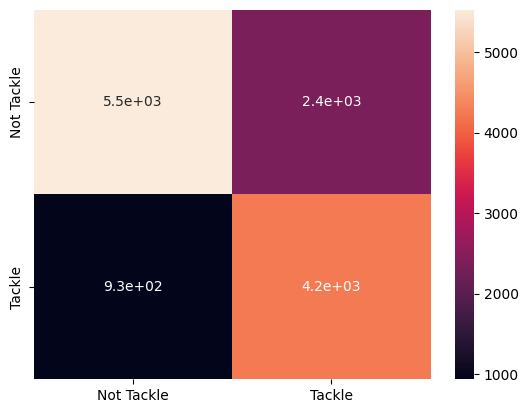

In [188]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(value,y_test)
sns.heatmap(cm,annot=True,xticklabels=['Not Tackle','Tackle'],
            yticklabels=['Not Tackle','Tackle'])

In [189]:
from sklearn.metrics import f1_score
f1_score(value,y_test)

0.7199864153506538

In [190]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion = 'entropy', random_state = 42)
rfc.fit(X_train,y_train)


RandomForestClassifier(criterion='entropy', random_state=42)

<Axes: >

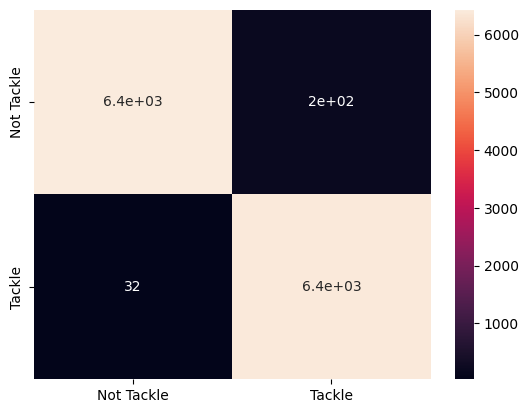

In [191]:
val=rfc.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(val,y_test)
sns.heatmap(cm,annot=True,xticklabels=['Not Tackle','Tackle'],
            yticklabels=['Not Tackle','Tackle'])

In [192]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

model = xgb.XGBClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

#Calculating accuracy
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

0.9739017296800857


In [193]:
f1_score(predictions,y_test)

0.9735884129811789

<Axes: >

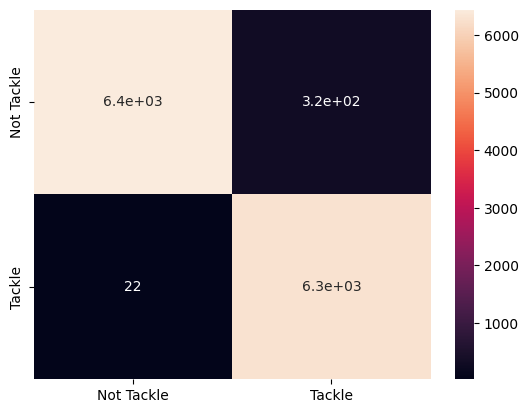

In [194]:
val=model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(val,y_test)
sns.heatmap(cm,annot=True,xticklabels=['Not Tackle','Tackle'],
            yticklabels=['Not Tackle','Tackle'])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(value,
                      )
sns.heatmap(cm,annot=True,xticklabels=['Not Tackle','Tackle'],
            yticklabels=['Not Tackle','Tackle'])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion = 'entropy', random_state = 42)
rfc.fit(X_train,y_train)

In [ ]:
val=rfc.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(val,y_test)
sns.heatmap(cm,annot=True,xticklabels=['Not Tackle','Tackle'],
            yticklabels=['Not Tackle','Tackle'])

In [ ]:

from sklearn.svm import SVC

# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(X_train, y_train)
svc_predict = svc_model.predict(x_test)# check performance
print('ROCAUC score:',roc_auc_score(y_test, svc_predict))
print('Accuracy score:',accuracy_score(y_test, svc_predict))
print('F1 score:',f1_score(y_test, svc_predict))

In [ ]:
y_test

In [ ]:
p=0
q=0
for i in value:
  if i==1:
    p+=1
  else:
    q+=1
print(p,q)

In [ ]:
c=0
d=0
e=0
f=0
for i in range(0,len(y_test)):
  if y_test[i]==0 and value[i]==0:
    c+=1
  elif y_test[i]==0 and value[i]==1:
    d+=1
  elif y_test[i]==1 and value[i]==0:
    e+=1
  else:
    f+=1

print(c)
print(d)
print(e)
print(f)

In [ ]:
for i in value:
  if value

In [ ]:
for col in select_column:
  print(f'{col}-{df_copy[col].unique()}')


In [ ]:
df_copy.defendersInTheBox.fillna(0)

In [ ]:
df_copy.head()

In [ ]:
df_copy=df_copy.dropna()

In [ ]:
# for col in select_column:
#   cat_encoder = OneHotEncoder()
#   val=cat_encoder.fit_transform(df_copy[col])
#   df_copy[f'{col}encoded']=val
#   df_copy.drop(col,axis=1)
df_=df_copy[select_column1]
df_copy.head()

In [ ]:
X_train = df_copy.values[0:2000]
X_test = df_copy.values[2000:]

In [ ]:
one_hot_encoded_data = pd.get_dummies(df_copy,columns=['event'])
one_hot_encoded_data.head()

In [ ]:
one_hot_encoded_data.columns

In [ ]:
one_hot_encoded_data.drop(['playId'],axis=1,inplace=True)

In [ ]:
one_hot_encoded_data.drop(['ballCarrierId'],axis=1,inplace=True)

In [ ]:
X_train = one_hot_encoded_data.values[0:1900]
X_test = one_hot_encoded_data.values[1900:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [ ]:
df_copy.dir

AttributeError: ignored

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Create a Sequential model
model = Sequential()

# Add a 1D Convolutional layer
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(24, 1)))

# Add a MaxPooling layer
model.add(MaxPooling1D(pool_size=2))

# Flatten the output to prepare for dense layers
model.add(Flatten())

# Add Dense layers for classification
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Assuming it's a binary classification task

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


In [ ]:
#X_test = X_test.reshape((num_test_samples, 24, 1))
#X_test=X_test.values
#y_test=y_test.values
np.isnan(X_test)

In [ ]:
#X_test = X_test.reshape((6776, 24, 1))

loss, accuracy = model.evaluate(X_test, y_test)

In [ ]:
df_copy=df_copy.drop(['passResult'],axis=1)


In [ ]:
df_copy

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train.shape

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
y_test.shape

In [ ]:
type(X_train.jerseyNumber[2])

In [ ]:
df_val=X_train.values
reshaped_df_val= df_val.reshape((27103, 24, 1))
reshaped_df_val.shape
#ValueError: cannot reshape array of size 677550 into shape (27103,25,1) should have same rows and dimensions

#please check the value

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

In [ ]:
model = Sequential()

In [ ]:
### can

Always have to give the 4D in input array shape
(batch_size, height, width, depth)

In [ ]:
model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(1,1000,25,1)))#the input has to be 4d meaning batch size and 3 domensions

#we

CNN
Convolutional kernels are great feature extractors that exploit two properties on the input images: local connectivity and spatial locality. Local connectivity means that each kernel is connected to a small region of the input image when performing the convolution. The spatial locality property means that the pixels/voxels where the convolutional kernel is applied are highly correlated, and usually processing them jointly makes it possible to extract meaningful feature representations. For example, a single convolutional kernel can learn to extract edges, textures, shapes, gradients, and so on.
We can use a 1-dimensional convolutional layer, however, this layer expects spatial locality correlation between the features. In other words, the convolutional kernel expects that columns that are contiguous, are spatially correlated (the relative position of columns means something) and this is not true for almost any tabular dataset.

#What should we do in case of tabular data
https://medium.com/spikelab/convolutional-neural-networks-on-tabular-datasets-part-1-4abdd67795b6

In [ ]:
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(25,1)))#how do i change the input size

In [ ]:
model.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
#model.add(MaxPooling1D(pool_size=5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='softmax'))


In [ ]:
type(model)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
type(X_train)

In [ ]:
type(y_train)

In [ ]:
y_train=np.array(y_train)

In [ ]:
type(X_train)

In [ ]:
X_train = X_train.values.astype(np.float32)
X_test = X_test.values.astype(np.float32)

In [ ]:
#X_train=X_train.tolist()

y_train=y_train.tolist()

In [ ]:
#what if we can changethe paramenters of input how does it affect it if we make the features to 7,7 instead of 1,28
#what if we can change the kernel size of we want to increase it to 50 if kernel size gretaer than input size will it throw error
model_1=model.fit(X_train,y_train,epochs=5,batch_size=500,validation_data=(X_test, y_test))

NameError: ignored

In [ ]:
pip install tab2img

In [ ]:
from tab2img.converter import Tab2Img

In [ ]:
# model = Tab2Img()
# model.fit_transform(X,y)

In [ ]:


# new = df.groupby(['States','Products']
#                  ,as_index = False
#                 ).count().pivot('States'
#                     ,'Products').fillna(0)
# display(new)
